In [86]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot as plt
import os, os.path
import PIL
import numpy as np

In [4]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 6.1.0


In [85]:
def convert_single_image_to_2D_array(path):
    from PIL import Image
    image = Image.open(path)
    data = np.array(image.resize((200,200)).convert('RGB'))
    #plt.imshow(image)
    return data

In [54]:
def create_data_single_class(folder_name, train_ratio):
    imgs = []
    path = folder_name
    valid_images = [".jpg",".gif",".png",".tga"]
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        else:
            file = os.path.join(path,f)
            data = convert_single_image_to_2D_array(file)
            imgs.append(data)
    imgs = np.array(imgs)
    #print(imgs.shape)
    
    l = imgs.shape[0]
    train_idx = np.random.choice(range(l), int(l*train_ratio), replace = False)
    #print(train_idx)
    test_idx = list(set(range(l)) - set(train_idx))
    #print(test_idx)
    
    train_set = imgs[train_idx]
    test_set = imgs[test_idx]
    
    
    return train_set, test_set
    

In [121]:
def create_dataset(folders, training_size):
    
    x_train, x_test = create_data_single_class(folders[0], training_size)
    y_train = np.zeros((1,x_train.shape[0]))
    y_test = np.zeros((1,x_test.shape[0]))
    y_train[0, :] = 0
    y_test[0,:] = 0
    
    for i in range(1,len(folders)): 
        x_trn, x_tst = create_data_single_class(folders[i], training_size)
        y_trn = np.zeros((1,x_trn.shape[0]))
        y_tst = np.zeros((1,x_tst.shape[0])) 
        y_trn[0, :] = i
        y_tst[0, :] = i
        
        x_train = np.concatenate([x_train, x_trn], axis=0)
        x_test = np.concatenate([x_test, x_tst], axis=0)
        y_train = np.concatenate([y_train, y_trn], axis=1)
        y_test = np.concatenate([y_test, y_tst], axis=1)
    
    train_idx = np.random.choice(range(x_train.shape[0]), x_train.shape[0], replace = False )
    test_idx = np.random.choice(range(x_test.shape[0]), x_test.shape[0], replace = False )
    
    x_train = x_train[train_idx]
    x_test = x_test[test_idx]
    y_train = y_train[0,train_idx]
    y_test = y_test[0,test_idx]

    return x_train, x_test, y_train, y_test

In [122]:
folders = ["virabhadrasana i", "virabhadrasana ii", "virabhadrasana iii"]

In [123]:
x_train, x_test, y_train, y_test = create_dataset(folders, training_size = 0.8)

In [124]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(y_train)

(136, 200, 200, 3) (35, 200, 200, 3) (136,) (35,)
[0. 2. 1. 2. 1. 0. 1. 2. 0. 1. 2. 1. 0. 2. 1. 0. 2. 2. 1. 1. 2. 0. 1. 2.
 0. 1. 2. 0. 1. 1. 1. 0. 2. 0. 1. 1. 2. 2. 1. 2. 2. 2. 0. 2. 1. 0. 0. 2.
 1. 1. 2. 1. 2. 2. 2. 2. 0. 1. 1. 0. 1. 2. 0. 2. 2. 2. 1. 0. 2. 0. 1. 0.
 0. 2. 0. 1. 2. 0. 0. 0. 2. 1. 0. 1. 2. 2. 0. 2. 1. 1. 1. 2. 2. 0. 0. 1.
 0. 2. 0. 1. 0. 0. 2. 1. 2. 2. 1. 2. 2. 0. 1. 0. 0. 1. 0. 2. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 2. 0. 2. 0. 1. 2. 2. 2.]


In [125]:
np.save('x_train', x_train)
np.save('x_test', x_test)
np.save('y_train', y_train)
np.save('y_test', y_test)

In [126]:
x_train_loaded = np.load('x_train.npy')
x_test_loaded = np.load('x_test.npy')
y_train_loaded = np.load('y_train.npy')
y_test_loaded = np.load('y_test.npy')

print(x_train_loaded.shape, x_test_loaded.shape)

(136, 200, 200, 3) (35, 200, 200, 3)


0.0


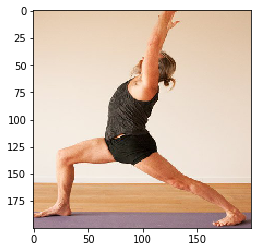

In [127]:
plt.imshow(x_train[0])
print(y_train[0])

2.0


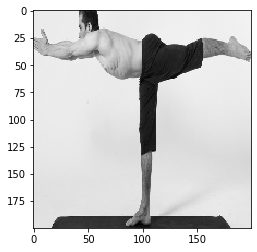

In [128]:
plt.imshow(x_test[4])
print(y_test[4])